# Acquisition de données en Python 

## Concepts



Pour simplifier, on utilisera surtout des fichiers de données au
format CSV.  Mais Python et Pandas permettent de récupérer des données
de sources très variées et selon des formats très divers. On
s'intéressera ici aux sources et formats suivants :

-   [JSON](https://fr.wikipedia.org/wiki/JavaScript_Object_Notation)
-   [XML](https://fr.wikipedia.org/wiki/Extensible_Markup_Language)
-   [HTML](https://fr.wikipedia.org/wiki/Web_scraping)
-   [Base de données relationnelles](https://fr.wikipedia.org/wiki/Base_de_donn%C3%A9es_relationnelle) avec le
    langage [SQL](https://fr.wikipedia.org/wiki/Structured_Query_Language)

Ces formats nous intéressent car ils sont au coeur des applications WEB : 
la plupart des données que nous pouvons récupérer sur internet ont ce format.
Ce sont des formats de données qui sont utilisées dans les applications WEB.
La plupart des données que vous utilisez dans une entreprise sont des données structurées, déjà nettoyées : il est plus compréhensible d'avoir des fichiers excels, c'est à dire des colonnes et des lignes.
Ce n'est pas le plus optimal en terme de performance pour les applications, on a donc développé de nouveaux format et de nouveaux protocoles qui permettent de résoudre les difficultés posées par les applications WEB.

## Architecture WEB

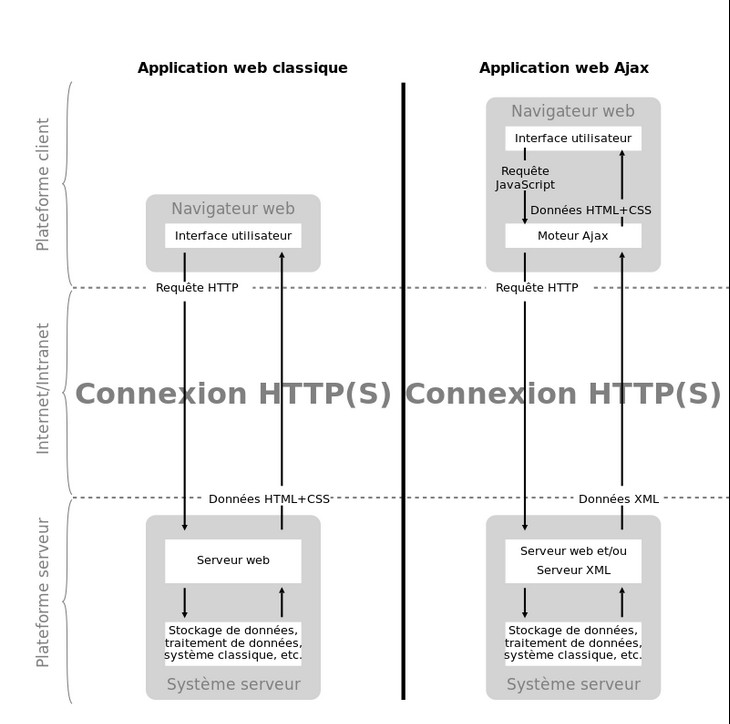

## JSON



Utilisé à l'origine pour communiquer simplement des informations à une
application javascript sur un navigateur et popularisé par les
services web de type [REST](https://fr.wikipedia.org/wiki/Representational_state_transfer) :

-   Textuel
-   Non structuré :
    -   *Documents* (≠ tables)
    -   Sans contrainte d'intégrité (*schéma*) ([pour l'instant ?](https://json-schema.org/))
-   Types très basiques


Nomenclature : https://www.json.org/json-en.html

### Non structuré

## Parser un JSON

Le parsing consiste à prendre de la donnée et la charger en mémoire de manière utilisable par le développeur.

### STRING ==> JSON

In [42]:
# load pandas and json modules                                                                                               
import pandas as pd
import json

# json string                                                                                                                
s = '{"col1":{"row1":1,"row2":2,"row3":3},"col2":{"row1":"x","row2":"y","row3":"z"}}'

# read json to data frame                                                                                                    
df = pd.read_json(s)
df

col1 col2
row1     1    x
row2     2    y
row3     3    z

### URL ==> JSON

In [2]:
import requests
import pandas as pd

url = "https://api.exchangerate-api.com/v4/latest/USD"
df = pd.read_json(url)

Si l'accès aux données nécessite une authentification, utiliser
directement *Pandas* provoque une erreur «HTTPError: HTTP Error 401:
UNAUTHORIZED» :



In [3]:
pd.read_json("https://httpbin.org/basic-auth/user/passwd", orient='index')

HTTPError: HTTP Error 401: UNAUTHORIZED

Il faut utiliser une bibliothèque comme [requests](https://requests.readthedocs.io/en/master/) qui permet
d'établir une connection sécurisée et authentifiée :



In [4]:
import requests
r = requests.get('https://httpbin.org/basic-auth/myuser/mypasswd', auth=('myuser', 'mypasswd'))
pd.read_json(r.text, orient='index')

0
authenticated    True
user           myuser

In [10]:
type(r.json())

dict

## XML

**XML** est une autre représentation textuelle qui, par rapport à *JSON*, à l'avantage de permettre la validation grâce à des [schémas](https://en.wikipedia.org/wiki/XML_schema). En revanche, il est beaucoup plus "lourd".

### Code pour la lecture et l'écriture de fichiers XML

©Tomasz Drabas

In [9]:
import xml.etree.ElementTree as ET
def write_xml(xmlFileName, data):
    with open(xmlFileName, 'w') as xmlFile:

        # write the headers
        xmlFile.write(
            '<?xml version="1.0" encoding="UTF-8"?>\n'
        )
        xmlFile.write('<records>\n')

        # write the data
        xmlFile.write(
            '\n'.join(data.apply(xml_encode, axis=1))
        )

        # write the footer
        xmlFile.write('\n</records>')
def xml_encode(row):
    # first -- we output a record
    xmlItem = ['  <record>']

    # next -- for each field in the row we create a XML markup
    #         in a <field name=...>...</field> format
    for field in row.index:
        xmlItem \
            .append(
                '    <var var_name="{0}">{1}</var>' \
                .format(field, row[field])
            )
   
    # last -- this marks the end of the record
    xmlItem.append('  </record>')

    # return a string back to the calling method
    return '\n'.join(xmlItem)

In [10]:
def read_xml(xmlFileName):
    with open(xmlFileName, 'r') as xml_file:
        # read the data and store it as a tree
        tree = ET.parse(xml_file)

        # get the root of the tree
        root = tree.getroot()

        # return the DataFrame
        return pd.DataFrame(list(iter_records(root)))
def iter_records(records):
    for record in records:
        # temporary dictionary to hold values
        temp_dict = {}   

        # iterate through all the fields
        for var in record:
           temp_dict[
               var.attrib['var_name']
           ] = var.text

        # generate the value
        yield temp_dict

## HTML



In [11]:
html_table = """
<table>
  <thead>
    <tr>
      <th>Langage de Programmation</th>
      <th>Créateur</th> 
      <th>Année</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>C</td>
      <td>Dennis Ritchie</td> 
      <td>1972</td>
    </tr>
    <tr>
      <td>Python</td>
      <td>Guido Van Rossum</td> 
      <td>1989</td>
    </tr>
    <tr>
      <td>Lisp</td>
      <td>John McCarthy</td> 
      <td>1958</td>
    </tr>
  </tbody>
</table>
"""

In [12]:
from IPython.display import display_html
display_html(html_table, raw=True)

Langage de Programmation 
 Créateur 
 Année 
 
 
 
 
 C 
 Dennis Ritchie 
 1972 
 
 
 Python 
 Guido Van Rossum 
 1989 
 
 
 Lisp 
 John McCarthy 
 1958

In [13]:
data_frames = pd.read_html("https://fr.wikipedia.org/wiki/Python_(langage)")
type(data_frames), type(data_frames[0])

(list, pandas.core.frame.DataFrame)

In [17]:
data_frames[4]

Version         Date de sortie  \
0   1.5(.2)         3 janvier 1998   
1       1.6       5 septembre 2000   
2       2.0        16 octobre 2000   
3       2.1          15 avril 2001   
4       2.2       21 décembre 2001   
5       2.3           29 juin 2003   
6       2.4       30 novembre 2004   
7       2.5      19 septembre 2006   
8       2.6       1er octobre 2008   
9       2.7         3 juillet 2010   
10      3.0    3 décembre 2008[74]   
11      3.1       27 juin 2009[75]   
12      3.2    20 février 2011[76]   
13      3.3  29 septembre 2012[77]   
14      3.4       16 mars 2014[79]   
15      3.5  13 septembre 2015[81]   
16      3.6   23 décembre 2016[83]   
17      3.7    31 janvier 2018[87]   
18      3.8        14 octobre 2019   
19      3.9         5 octobre 2020   
20      NaN                    NaN   

                                       Fin de support  \
0                                       13 avril 1999   
1                                      Septembre 2000   
2                                        22 juin 2001   
3                                        9 avril 2002   
4                                         30 mai 2003   
5                                        11 mars 2008   
6                                    19 décembre 2008   
7                                         26 mai 2011   
8   24 août 2010 (mises à jour de sécurité jusqu'a...   
9                                    1er janvier 2020   
10                                    13 février 2009   
11  12 juin 2011 (mises à jour de sécurité jusqu'e...   
12  13 mai 2013 (mises à jour de sécurité jusqu'au...   
13  8 mars 2014 (mises à jour de sécurité jusqu'au...   
14  9 août 2017 (mises à jour de sécurité jusqu'au...   
15  8 août 2017 (mises à jour de sécurité jusqu'au...   
16  24 décembre 2018 (mises à jour de sécurité jus...   
17  27 juin 2020 (mises à jour de sécurité jusqu'e...   
18  avril 2021 (mises à jour de sécurité jusqu'en ...   
19  mai 2022 (mises à jour de sécurité jusqu'en oc...   
20                                                NaN   

                                       Nouveautés[73]  
0   Ajout du mot clé assert Possibilité d'importer...  
1   La méthode append() des listes n'accepte plus ...  
2   Changement majeur : support d'Unicode Ajout de...  
3   Création du module __future__ pour rendre les ...  
4   Unification de Type et de Class : on peut main...  
5   Ajout des fonctions enumerate() et sum() Le ty...  
6   Ajout des décorateurs de fonction/méthode (@de...  
7   Ajout de l'instruction with Ajout des méthodes...  
8   Nouvelle syntaxe de formatage de chaînes de ca...  
9   Syntaxe pour les ensembles littéraux : {1, 2, ...  
10  Fusion des types 'int' et 'long' Les chaînes s...  
11  Ajout d'un type de dictionnaire ordonné, Optim...  
12  Ajout du module argparse pour le parsing des a...  
13  Ajout de la syntaxe yield from​ pour utiliser ...  
14  ajout du module asyncio pour la programmation ...  
15  nouvel opérateur pour les matrices : a @ b​[82...  
16  Possibilité d'écrire les grands nombres sous l...  
17  Nouveaux modules. Nouveau mode de développemen...  
18  Cette section est vide, insuffisamment détaill...  
19  Support de l'opérateur union pour les dictionn...  
20                                                NaN

## Base de données relationnelles



Permet d'extraire efficacement des données à partir de sources
extrêmement volumineuses (la gestion est externalisée au SGDBR).

Les données sont *structurées*.
Les requêtes sont écrites en [SQL](https://fr.wikipedia.org/wiki/Structured_Query_Language).



# ⚠ ATTENTION !!!

Il ne faut **jamais** mettre de login/mot de passe dans du code, y compris dans un Notebook !

On pourra utiliser des variables d'environnement qui auront été renseignées avant de lancer le serveur Jupyter :

In [16]:
import os
os.environ['DB_PASSWORD']
os.environ['DB_USER']

'alexis@pgserver-simplon'

## Exemples de requêtes sur une BDD relationnelle


**⚠** Bien évidemment, la remarque sur les login/mot de passe s'applique aussi lorsqu'il s'agit des informations de connection à une base de données !

In [21]:
import sqlite3

conn = sqlite3.connect(":memory:")

In [31]:
conn.execute("CREATE TABLE prog_languages (id INTEGER PRIMARY KEY, name VARCHAR, creator VARCHAR, year YEAR);")
conn.executemany("INSERT INTO prog_languages(name, creator, year) VALUES (?,?, ?)",
                [('C', 'Dennis Ritchie', 1972),
                 ('Python', 'Guido Van Rossum', 1989),
                ('Lisp', 'John McCarthy', 1958),('Lisp', 'John McCarthy', 1958)]);

OperationalError: table prog_languages already exists

In [30]:
conn.executemany("INSERT INTO prog_languages(name, creator, year) VALUES (?,?, ?,?)",
                [('C', 'Dennis Ritchie', 1972),
                 ('Python', 'Guido Van Rossum', 1989),
                ('Lisp', 'John McCarthy', 1958),('Lisp', 'John McCarthy', 1958)]);

OperationalError: 4 values for 3 columns

In [27]:
a[0]

('C', 'Dennis Ritchie', 1972)

In [36]:
df = pd.read_sql_query("SELECT * FROM prog_languages;", conn)
df[df.year<1975]

id  name         creator  year
0   1     C  Dennis Ritchie  1972
2   3  Lisp   John McCarthy  1958